## Analysis of VANET dataset 

In [3]:
# imports 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump

In [4]:
# paths

dataset1 = "Dataset\\at1.csv"
dataset2 = "Dataset\\at2.csv"
dataset4 = "Dataset\\at4.csv"
dataset8 = "Dataset\\at8.csv"
dataset16 = "Dataset\\at16.csv"
datasetmodified16 = "Dataset\\modifiedat16.csv"

In [5]:
# load data function

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

In [8]:
# load into dataframes

df1 = load_data(dataset1)
df2 = load_data(dataset2)
df4 = load_data(dataset4)
df8 = load_data(dataset8)
df16 = load_data(dataset16)
dfm16 = load_data(datasetmodified16)


In [9]:
# basic info in the files

print("for df1")
print(df1.head())
print(df1.info())


print("for df2")
print(df2.head())
print(df2.info())

print("for df4")
print(df4.head())
print(df4.info())

print("for df8")
print(df8.head())
print(df8.info())

print("for df16")
print(df16.head())
print(df16.info())

print("for dfm16")
print(dfm16.head())
print(dfm16.info())

for df1
     sendtime_1  sender_1  messageID       pos-x1       pos-y1  pos-z1  \
0  25200.437587       7.0    26096.0  3588.822555  5912.419649   1.895   
1  25201.437587       7.0    91142.0  3590.480099  5942.298376   1.895   
2  25202.437587       7.0   155702.0  3592.700818  5972.122750   1.895   
3  25203.437587       7.0   221221.0  3594.920543  6001.933773   1.895   
4  25204.437587       7.0   285613.0  3597.878662  6031.726375   1.895   

     spd-x1     spd-y1  spd-z1  AttackerType    sendtime_2  sender_2  \
0  1.277829  30.012756     0.0             0  25201.437587       7.0   
1  2.228684  29.931341     0.0             0  25202.437587       7.0   
2  2.224379  29.873523     0.0             0  25203.437587       7.0   
3  2.226374  29.900320     0.0             0  25204.437587       7.0   
4  3.156679  29.892922     0.0             0  25205.437587       7.0   

        pos-x2       pos-y2  pos-z2    spd-x2     spd-y2  spd-z2  
0  3590.480099  5942.298376   1.895  2.228684  

#### Model Evaluation Functions

In [11]:
def evaluate_model(y_true, y_pred):
    return{
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1': f1_score(y_true, y_pred, average='weighted')
    }

In [12]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [13]:
def plot_feature_importance(model, X, title):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        feature_names = X.columns
        
        plt.figure(figsize=(12, 8))
        plt.title(title)
        plt.bar(range(X.shape[1]), importances[indices])
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()


#### Type1 Data Prepare 

In [19]:

X = df1.drop('AttackerType', axis=1)
y = df1['AttackerType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Type1 using Gaussian Navin Bayes

Gaussian Naive Bayes Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000


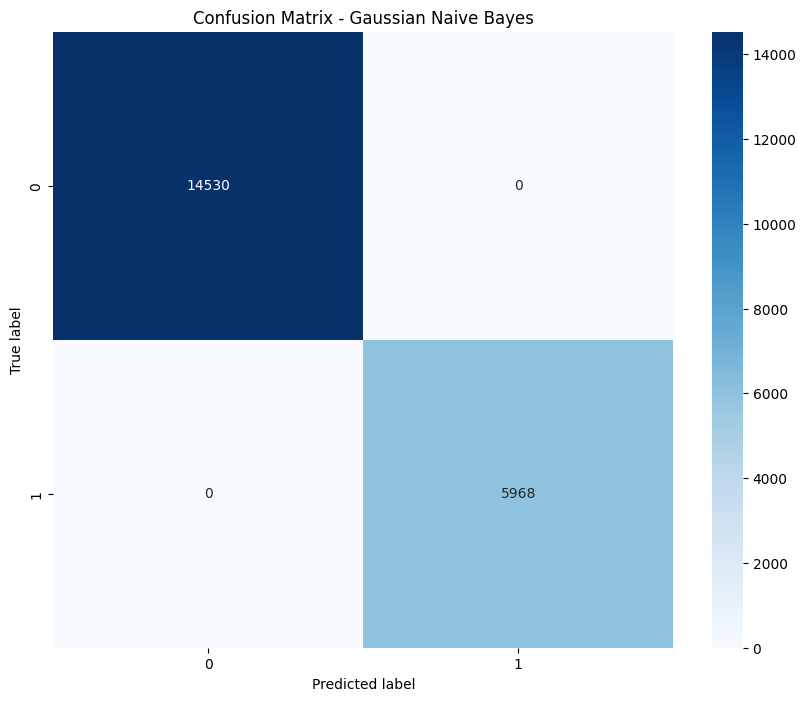

In [20]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)

results_gnb = evaluate_model(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Results:")
for metric, value in results_gnb.items():
    print(f"{metric.capitalize()}: {value:.4f}")

plot_confusion_matrix(y_test, y_pred_gnb, 'Confusion Matrix - Gaussian Naive Bayes')

#### Type 1 using Decison Tree

Decision Tree Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000


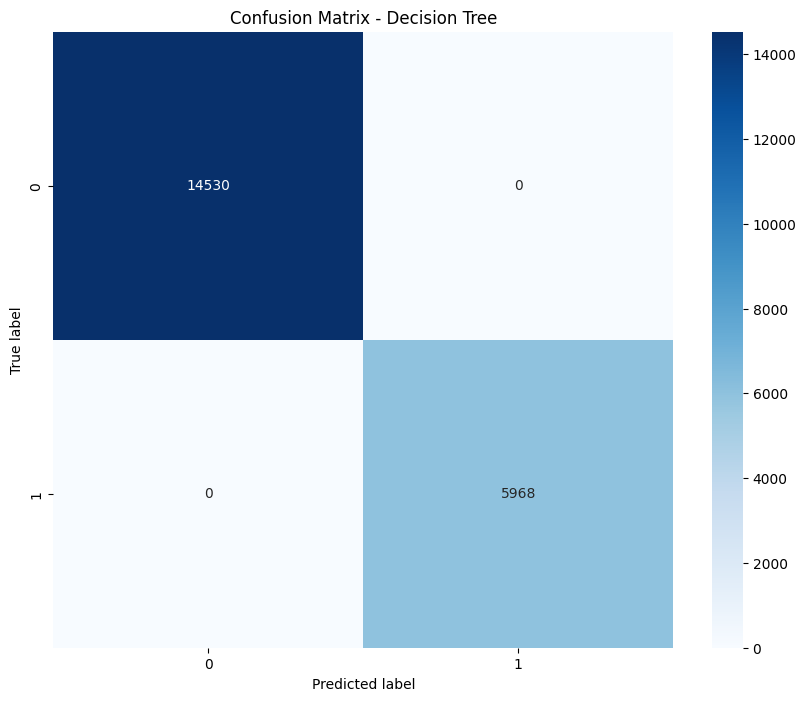

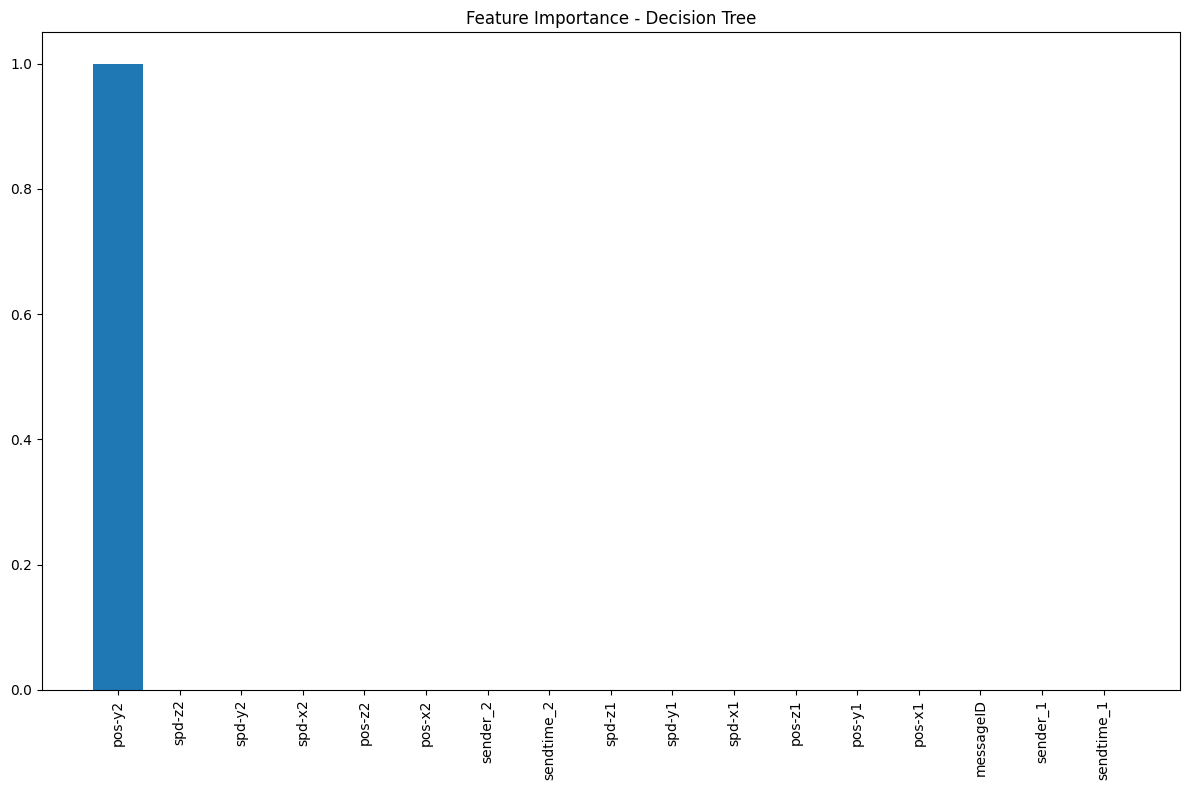

In [16]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

results_dt = evaluate_model(y_test, y_pred_dt)
print("Decision Tree Results:")
for metric, value in results_dt.items():
    print(f"{metric.capitalize()}: {value:.4f}")

plot_confusion_matrix(y_test, y_pred_dt, 'Confusion Matrix - Decision Tree')
plot_feature_importance(dt, X, 'Feature Importance - Decision Tree')

#### Type1 Using Random Forest

Random Forest Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000


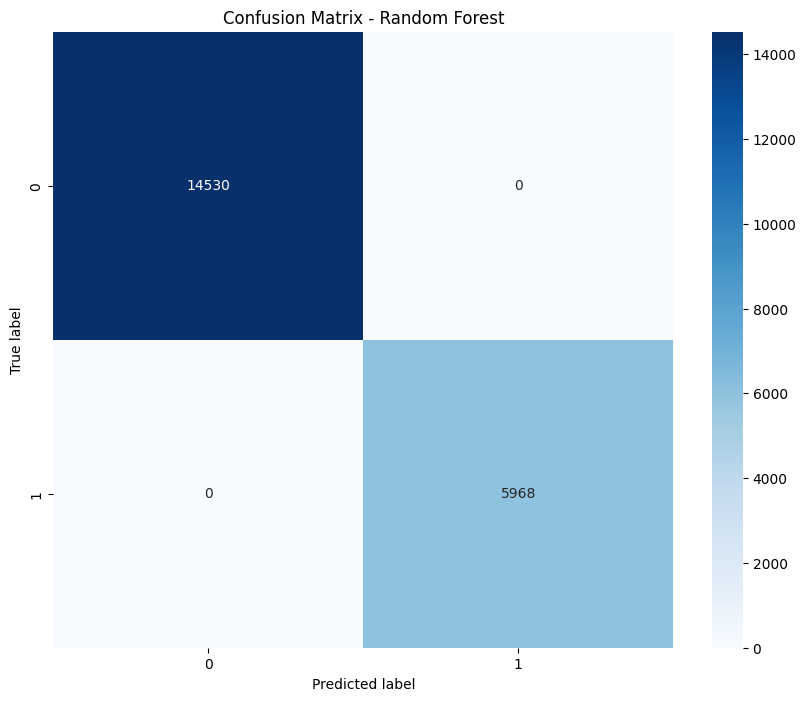

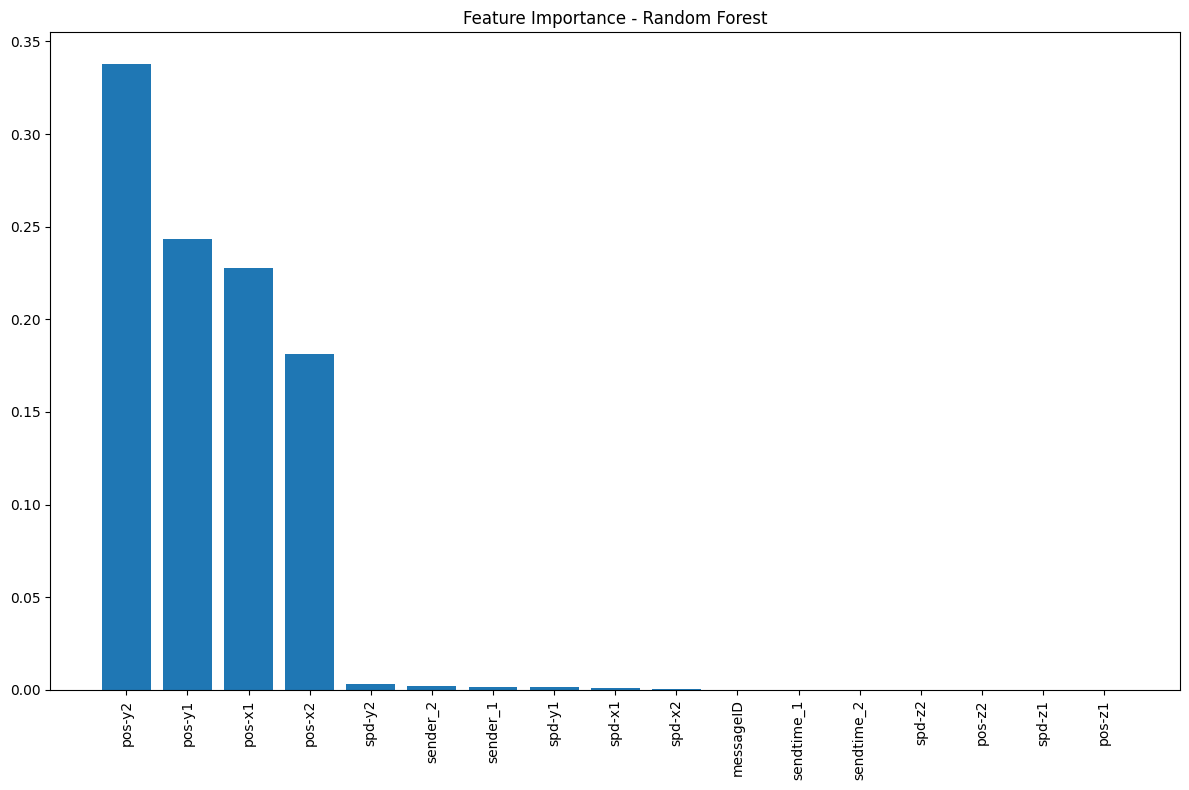

In [17]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

results_rf = evaluate_model(y_test, y_pred_rf)
print("Random Forest Results:")
for metric, value in results_rf.items():
    print(f"{metric.capitalize()}: {value:.4f}")

plot_confusion_matrix(y_test, y_pred_rf, 'Confusion Matrix - Random Forest')
plot_feature_importance(rf, X, 'Feature Importance - Random Forest')

#### Type 2 Data Prep

In [21]:
X = df2.drop('AttackerType', axis=1)
y = df2['AttackerType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Type2 Using Decison Tree


Decision Tree Results:
Accuracy: 0.9968
Precision: 0.9968
Recall: 0.9968
F1: 0.9968


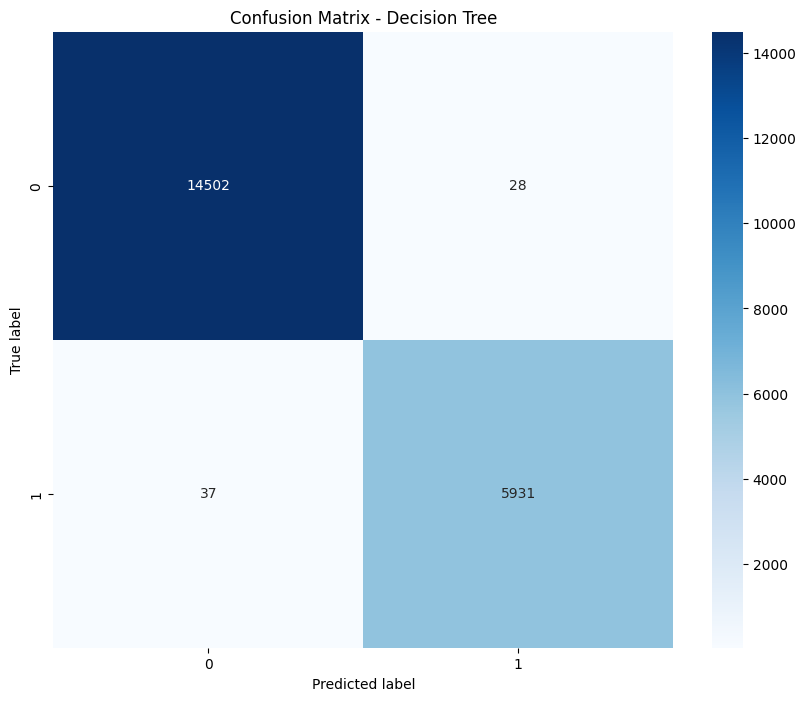

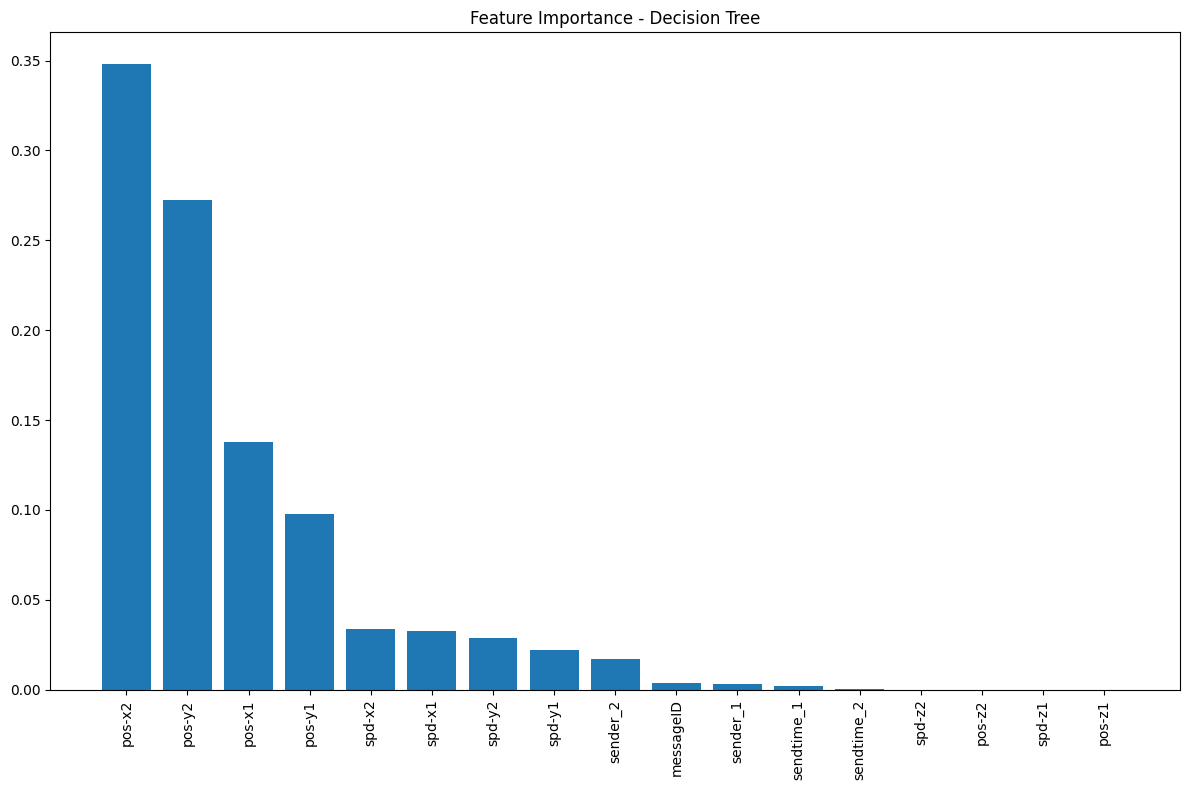

In [22]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

results_dt = evaluate_model(y_test, y_pred_dt)
print("Decision Tree Results:")
for metric, value in results_dt.items():
    print(f"{metric.capitalize()}: {value:.4f}")

plot_confusion_matrix(y_test, y_pred_dt, 'Confusion Matrix - Decision Tree')
plot_feature_importance(dt, X, 'Feature Importance - Decision Tree')

#### Random Forest for Type 4, Type 8 and Type 16

In [26]:
# data prep

df = pd.concat([df4, df8, df16], ignore_index=True)

X = df.drop('AttackerType', axis=1)
y = df['AttackerType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest Results:
Accuracy: 0.9943
Precision: 0.9943
Recall: 0.9943
F1: 0.9943


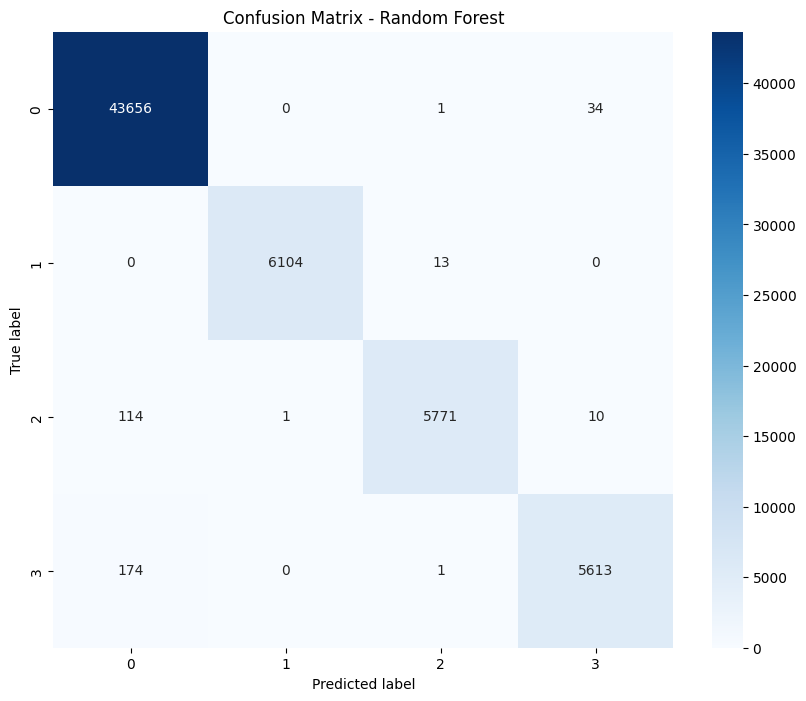

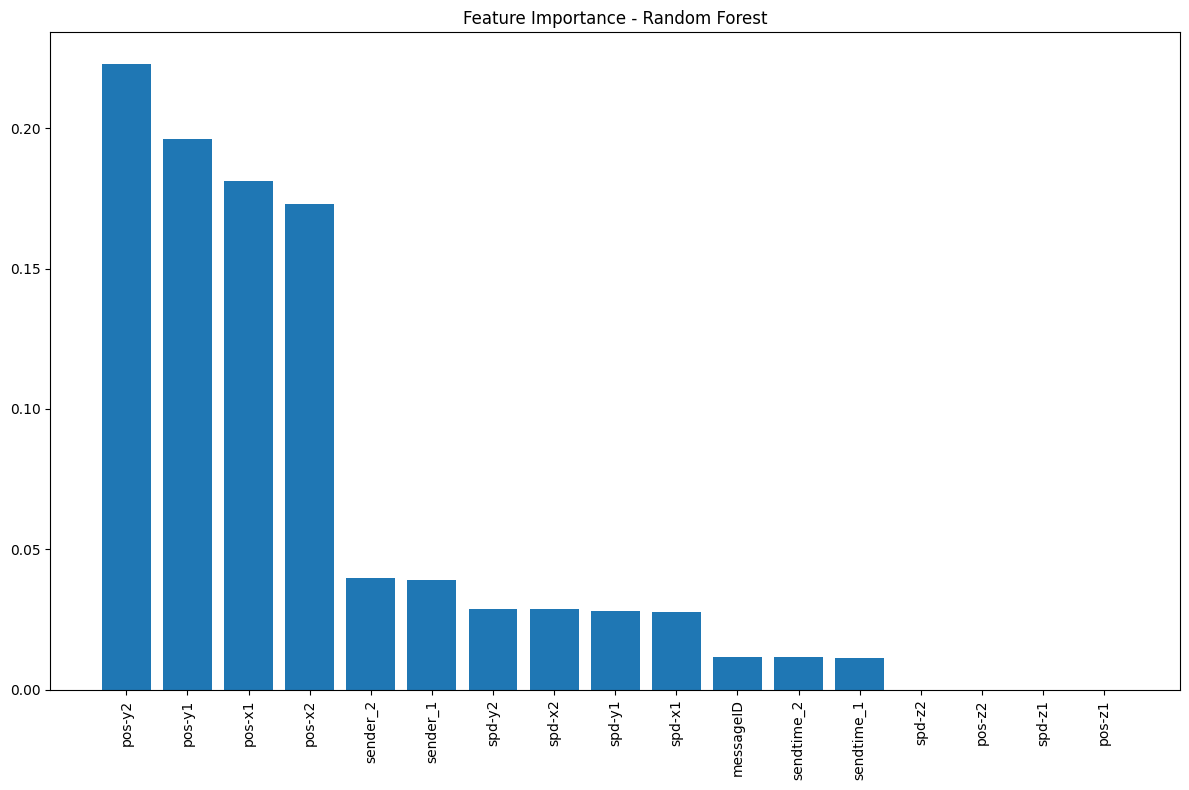

In [27]:
# model

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

results_rf = evaluate_model(y_test, y_pred_rf)
print("Random Forest Results:")
for metric, value in results_rf.items():
    print(f"{metric.capitalize()}: {value:.4f}")

plot_confusion_matrix(y_test, y_pred_rf, 'Confusion Matrix - Random Forest')
plot_feature_importance(rf, X, 'Feature Importance - Random Forest')
